In [1]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
# %matplotlib widget

# If you are using Jupyter Notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Exercise 6.1: Moving Average Filter

During last exercise we simulated the effect of noise on a simple cosine signal.
Now let’s try to get rid of it again. 
We know from the lecture, that if our noise has a mean of 0, we can recover the original signal by taking the mean.

However, when our signal is not constant, we need a more elaborate method: the moving average (MA).

a) Show that the noise can be removed by taking the mean. Overlay Gaussian noise on top of a constant signal and try to recover the constant value by taking the mean over the entire signal.

b) Create a set of MA filters with a rectangular window and varying number of coefficients. Plot their frequency responses and compare them. Assume a sampling rate of 100 Hz to get the frequency response in Hz.

c) Create a 10 second cosine signal with a frequency of 2 Hz at a sampling rate of 200 Hz. Add Gaussian noise with an STD of 0.25.

d) Use the `scipy.signal.lfilter()` to filter the noise cosine signal using a MA with window size 2, 4, and 16. Make sure your x-axis has the correct unit. Explain what you see. Are the outputs as expected?

### Solution:

d) Note that in this exercise we only calculate the b coeficients of the MA filter.
   This leads to the correct results as python by default assumes certain a coefficients.
   We will learn more about how to calculate them correctly.

<IPython.core.display.Javascript object>


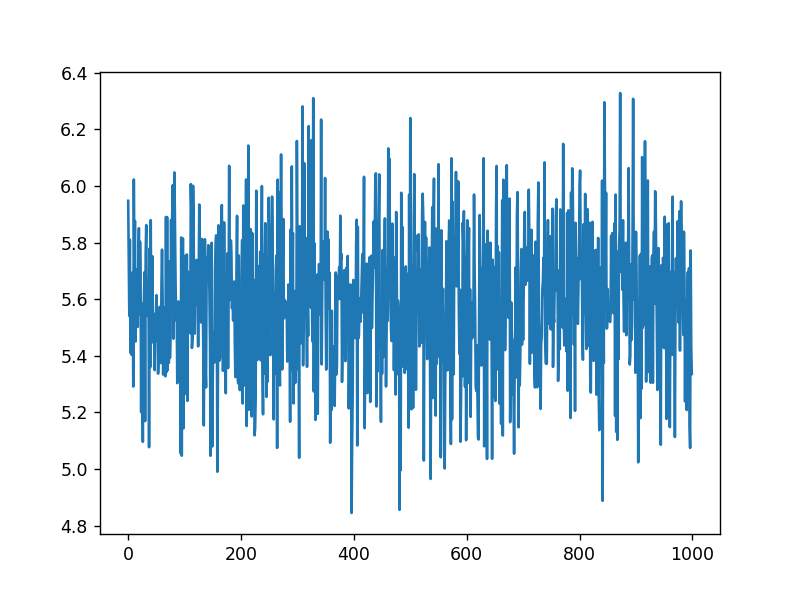

The filtered value is 5.587689932463577


In [2]:
# Create a constant signal of value A with length 1000
A = 5.6
### BEGIN SOLUTION
signal = np.ones(1000) * 5.6
### END SOLUTION
# Create Gaussion Noise with an STD of 0.25 and add it to the signal
### BEGIN SOLUTION
noise = np.random.normal(0, 0.25, 1000)
signal += noise
### END SOLUTION
# Plot the noisy signal
### BEGIN SOLUTION
plt.figure()
plt.plot(signal)
### END SOLUTION
# Take the mean over the signal and compare its value to A
### BEGIN SOLUTION
filtered_A = np.mean(signal)
### END SOLUTION
print('The filtered value is', filtered_A)

<IPython.core.display.Javascript object>


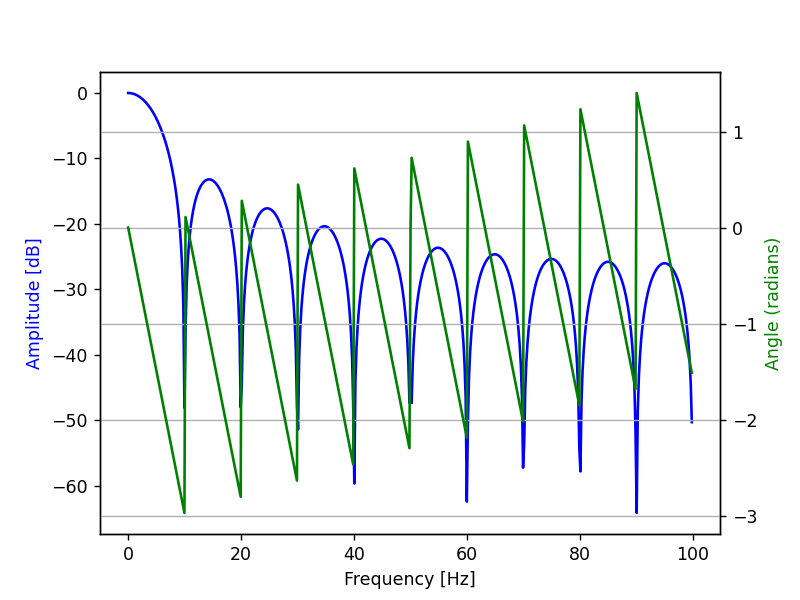

interactive(children=(IntSlider(value=29, description='n', max=56, min=2), Output()), _dom_classes=('widget-in…

In [3]:
from scipy import signal
from ipywidgets import interact

sampling_rate = 200 # Hz

# Create a function that returns coeficcients for a rectangular window with length n
def rec_win(n):
    """Return the "b" coefficients of a rectengular window with len n"""
    ### BEGIN SOLUTION
    coefficients = 1/n * np.ones(n)
    ### END SOLUTION
    return coefficients

# Create a function to calculate and plot the frequency response
def plot_freq_response(coef, sampling_rate=sampling_rate, create_new_fig=True):
    """Plot the freq response of a window.
    
    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        create_new_fig: If True a new figure is created for the plot
    """
    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()
    # Calculate the frequency response using scipy.signal.freqz 
    # Use the fs parameter to calculate the output relative to the sampling rate
    ### BEGIN SOLUITON
    w, h = signal.freqz(b=coef, fs=sampling_rate)
    ### END SOLUTION
    
    # Use the documentation of scipy.signal.freqz to create a twinx plot
    # showing the amplitdue and the phase response
    # Remember, that we used a sampling rate during calculation.
    # Therefore, our x Axis is in Hz.
    ### BEGIN SOLUTION
    ax1.plot(w, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    ax2.plot(w, angles, 'g')
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')
    ### END SOLUTION


# Use the interact function below to test different window length
def interactive_helper(n):
    plt.clf()
    plot_freq_response(rec_win(n), create_new_fig=False)

plt.figure()
interact(interactive_helper, n=(2, 56));

<IPython.core.display.Javascript object>


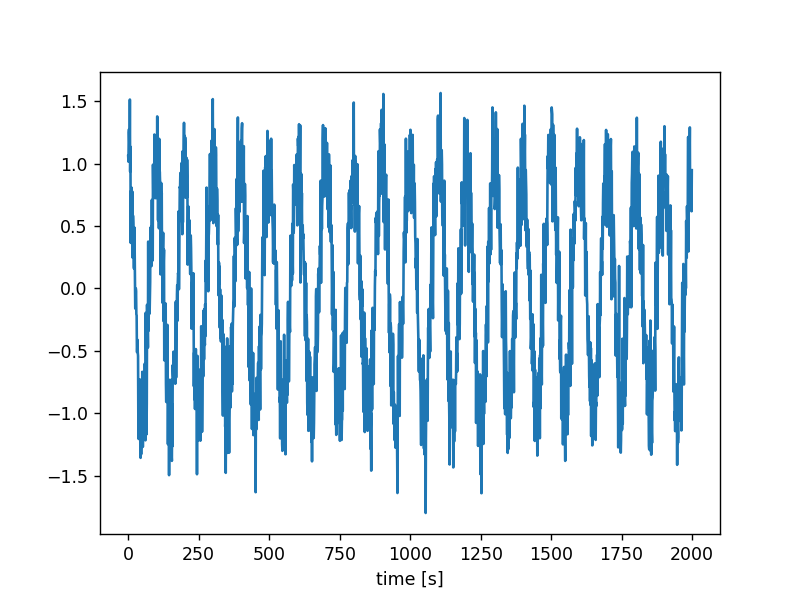

Text(0.5, 0, 'time [s]')

In [4]:
# Create a cosine signal with added gaussian noise
### BEGIN SOLUTION
t = np.arange(0, 10, 1/sampling_rate)
cos_signal = np.cos(t * 2*np.pi * 2)
noise = np.random.normal(0, 0.25, len(cos_signal))
cos_signal_with_noise = cos_signal + noise
### END SOLUTION
# Plot the signal
### BEGIN SOLUTION
plt.figure()
plt.plot(cos_signal_with_noise)
plt.xlabel('time [s]')
### END SOLUTION

<IPython.core.display.Javascript object>


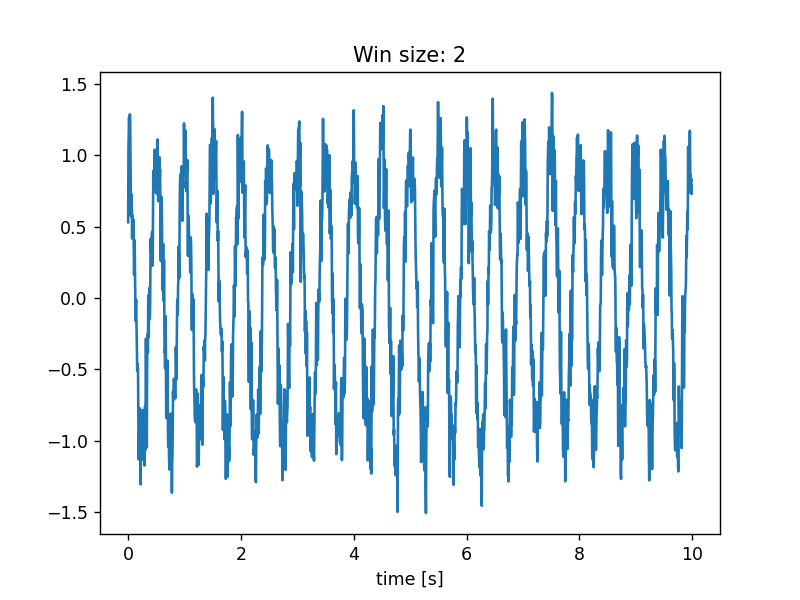

<IPython.core.display.Javascript object>


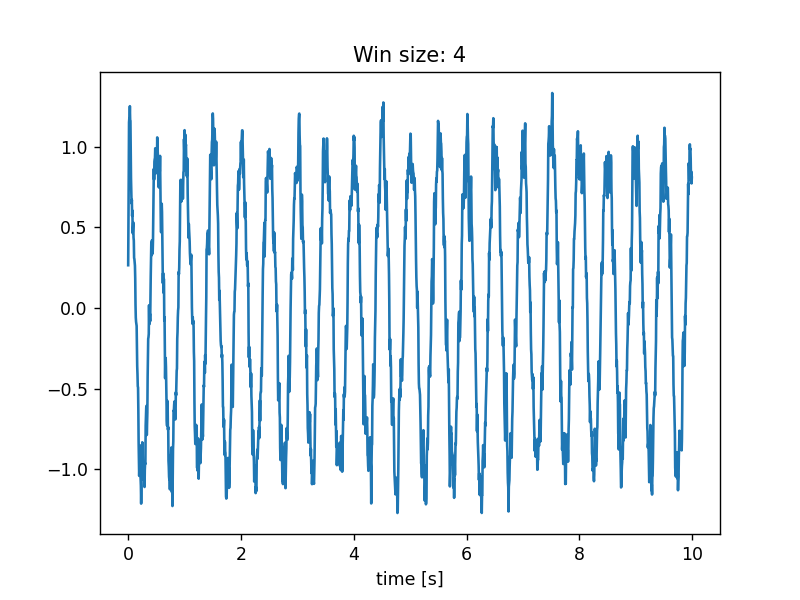

<IPython.core.display.Javascript object>


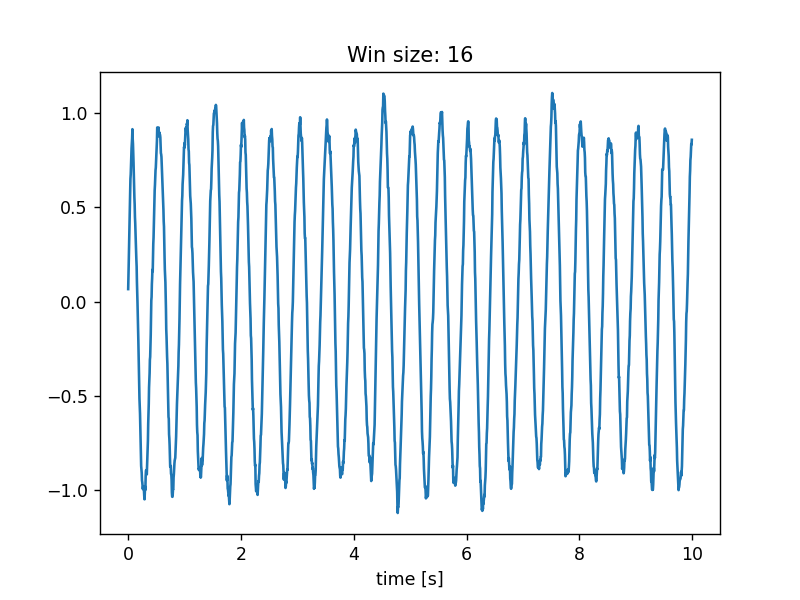

<IPython.core.display.Javascript object>


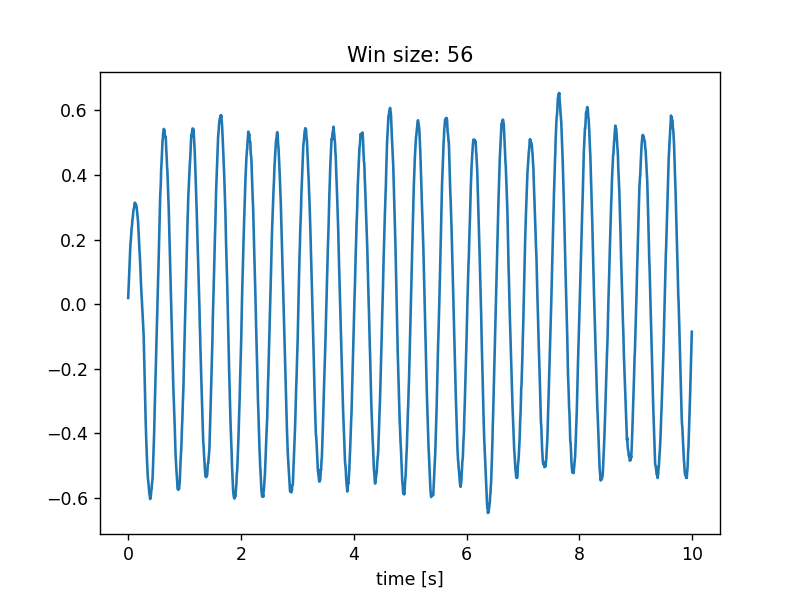

In [5]:
# Use a for loop to call `lfilter` for all window length.
# think about the transfer function of your filter.
# What do you need to pass for `a`?
### BEGIN SOLUTION
for n in [2, 4, 16, 56]:
    plt.figure()
    plt.title('Win size: {}'.format(n))
    plt.plot(t, signal.lfilter(rec_win(n), 1, cos_signal_with_noise))
    plt.xlabel('time [s]')
### END SOLUTION

## Exercise 6.2: Phase and frequency response

We have seen in the previous exercise that a MA can remove high frequency noise. But does it also affect our signal?

a) Perform the same filtering as in 7.1 d) but on the signal **without** added noise. Place all plots in the same figure and add a legend.

b) Describe the effects you can observe. Go back to your frequency response plot and try to explain the observed changes to the signal based on the frequency response of the filter.

c) Pick the first clear peak of the signal filtered with n = 16 and the one with no filter and use `np.argmax` to identify the exact position of this peak. How many samples are they apart? Can you derive this value from the phase response plot above?

d) The observed phase shift can cause problems when the exact timing of events is from importance. Luckily, we can use forward-backward filtering to solve the issue. Use `signal.filtfilt` instead of `signal.lfilter` to test its effect. Describe the result.

### Solution:
b) We can see that the overal amplitude of the signal dicreases and that the signal gets more and more shifted with increasing filter order.
   This can be explained, because the amplitude and the pahse response get steeper with increasing filter order.

<IPython.core.display.Javascript object>


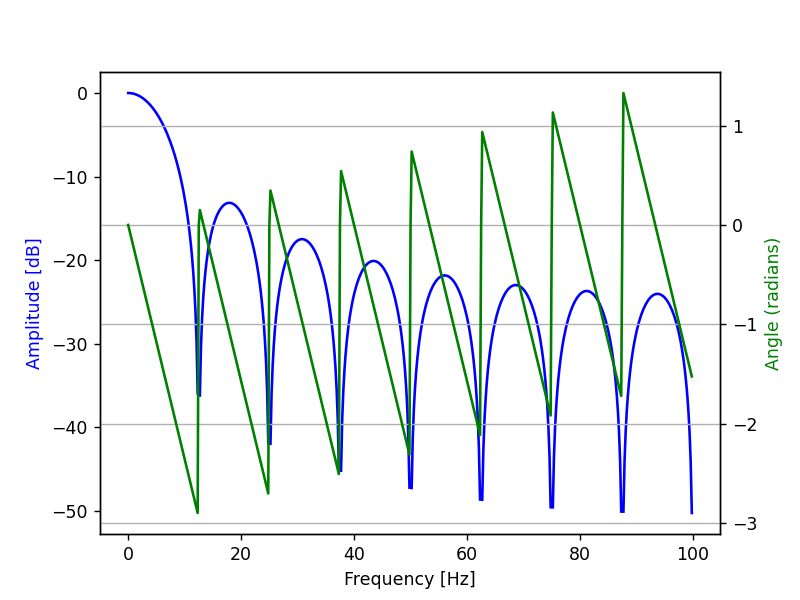

In [6]:
# Filter the clean cosine signal and plot all results into the same figure
### BEGIN SOLUTION
plt.figure()
plt.plot(t, cos_signal, label=0)
for n in [2, 4, 16, 56]:
    plt.plot(t, signal.lfilter(rec_win(n), 1, cos_signal), label=n)
plt.legend()
### END SOLUTION

In [7]:
# Identify the position of the the first max
### BEGIN SOLUTION
roi = (int(0.75 * sampling_rate), int(1.25 * sampling_rate))
raw_signal_peak = roi[0] + np.argmax(cos_signal[roi[0]:roi[1]])
n_16_signal_peak = roi[0] + np.argmax(signal.lfilter(rec_win(16), 1, cos_signal)[roi[0]:roi[1]])
shift = n_16_signal_peak - raw_signal_peak
print(raw_signal_peak, n_16_signal_peak, shift)
print('The two peaks are {} samples or {} seconds appart.'.format(shift, shift/sampling_rate))
### END SOLUTION

200 208 8
The two peaks are 8 samples or 0.04 seconds appart.


In [8]:
# Calculate the the time shift in radians to compare it with the freqency plot
# Remember 2*pi is one period in radians and your original signal has a frequency of 2 Hz
### BEGIN SOLUTION
periode_time = 1 / 2 # s
percent_of_period = shift / sampling_rate / periode_time
rad_shift = 2 * np.pi * percent_of_period
print('The two peaks are {} seconds or {} radians appart.'.format(shift/sampling_rate, rad_shift))
### END SOLUTION

The two peaks are 0.04 seconds or 0.5026548245743669 radians appart.


### Solution:
c) We can not directly compare the value with the phase plot above.
The phase plot gives us the shift in radians.
This value is independent from the signal frequency.
But, this means we need to convert our second value into radians:
$2\pi$ is equivalent to one entire period of our cosine.
At 2 Hz this means $2\pi$ is equivalent to 0.5 seconds.
Therefore, 0.04 seconds is equvalent to 0.5 rad.
If we look at the phase shift at 2 Hz above, we can confirm that this is close to the actual value of 0.45 rad.
The remaining differences is a limitation of our resolution at the given sampling rate.

<IPython.core.display.Javascript object>


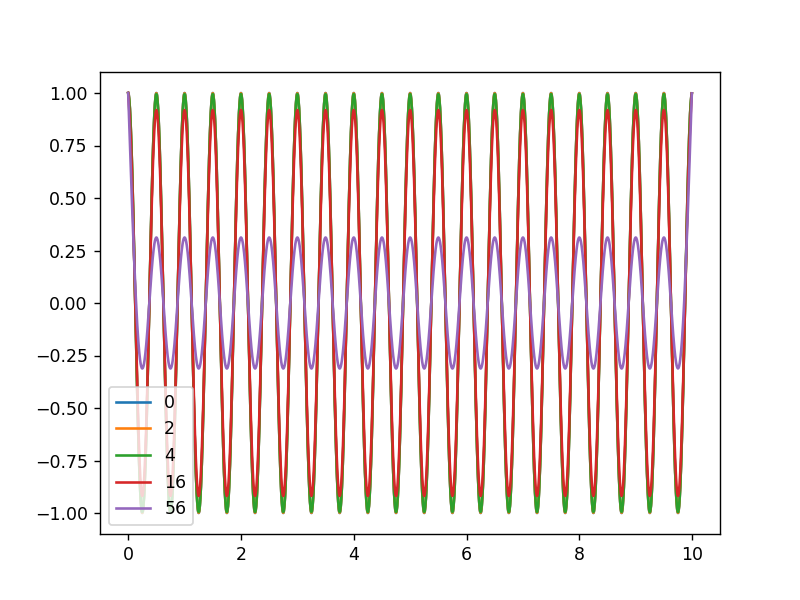

In [16]:
# Filter the clean cosine signal using filtfilt
### BEGIN SOLUTION
plt.figure()
plt.plot(t, cos_signal, label=0)
for n in [2, 4, 16, 56]:
    plt.plot(t, signal.filtfilt(rec_win(n), 1, cos_signal), label=n)
plt.legend()
### END SOLUTION

### Solution:

d) Using `filtfilt` all signals are in phase now.
However, the amplitude of the higher order results are now attenuated more.
This is because the magnitude response of our filter is now squared.
Therefore, you sometimes need to adjust filter parameters before using `filtfilt` to get the desired output.

## Exercise 6.3: Fourier Transform - Frequency components of a signal

The Fourier Transform is one of the most important algorithms ever invented. In BioSig, we can use it for two applications:

1) Obtain Frequency information of a signal

2) Filter Signals using frequency domain filters.

General Note: When learning about the Fourier Transform it is important to differentiate between the continuous and the discrete Fourier transform. When we are working with digital signals, we always use the discrete Fourier Transform

General Note 2: Watch this Video https://www.youtube.com/watch?v=spUNpyF58BY review this website http://www.thefouriertransform.com/pairs/fourier.php


a) Plot the DFT of a pure sin wave at different frequencies

b) Plot the DFT of two combined sin waves of different frequencies

c) Plot the DFT of a cosine signal with added noise

d) Plot the DFT of a square wave. Try different duty cycles.

e) Try to understand each output. Does it makes sense based on your understanding of FFT?

In [17]:
import scipy

def plot_fft(x, y, sampling_rate, log=False):
    T = 1.0 / sampling_rate
    N = len(y)
    
    yf = scipy.fft.fft(y)
    if log:
        yf = np.log(yf)
    xf = np.fft.fftshift(np.fft.fftfreq(N, d=T))

    fig, (ax1, ax2) = plt.subplots(nrows=2)
    ax1.set_title('Signal')
    ax1.plot(x, y)
    ax1.set_xlabel('time [s]')
    ax2.set_title('abs(FFT)')
    ax2.plot(xf, 1/N * np.fft.fftshift(np.abs(yf)))
    ax2.set_xlabel('frequency [Hz]')
    fig.tight_layout()

<IPython.core.display.Javascript object>


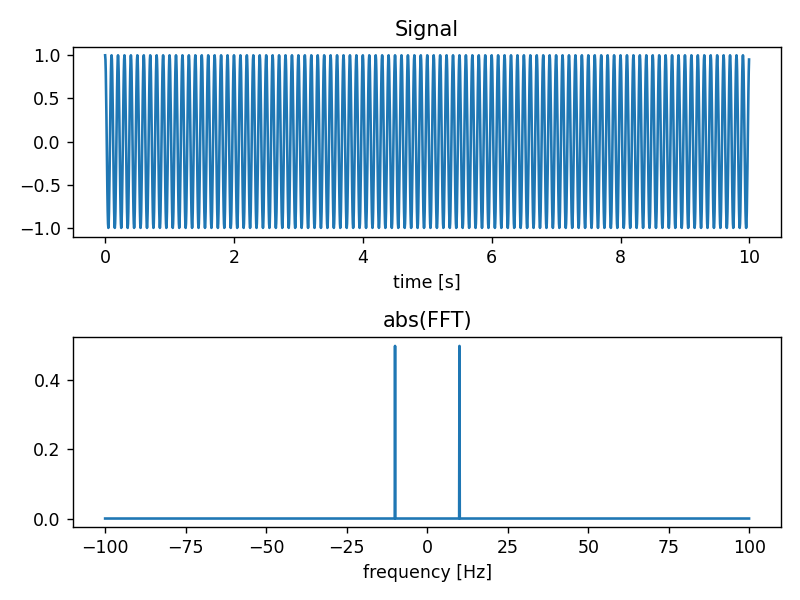

In [18]:
sampling_rate = 200
# Create and plot a sin or cos wave of a specific frequency

### BEGIN SOLUTION
frequency = 10 # hz
t = np.arange(0, 10, 1/sampling_rate)
cos_signal = np.cos(t * 2*np.pi * frequency)
plot_fft(t, cos_signal, sampling_rate)
### END SOLUTION

<IPython.core.display.Javascript object>


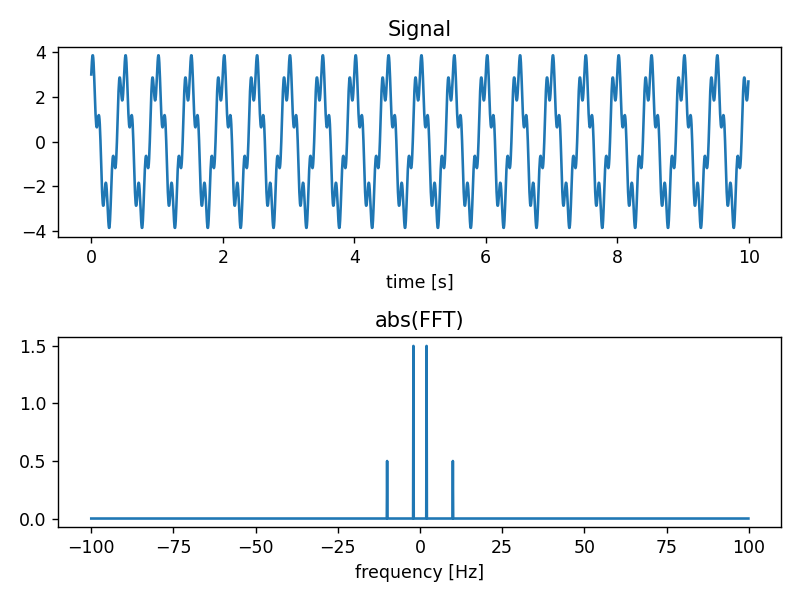

In [19]:
# Combine and plot the FFT two or more sin waves

### BEGIN SOLUTION
frequency_1 = 10 # hz
frequency_2 = 2 # hz
t = np.arange(0, 10, 1/sampling_rate)
cos_signal_1 = np.sin(t * 2*np.pi * frequency_1)
cos_signal_2 = 3 * np.cos(t * 2*np.pi * frequency_2)
plot_fft(t, cos_signal_1 + cos_signal_2, sampling_rate)
### END SOLUTION

<IPython.core.display.Javascript object>


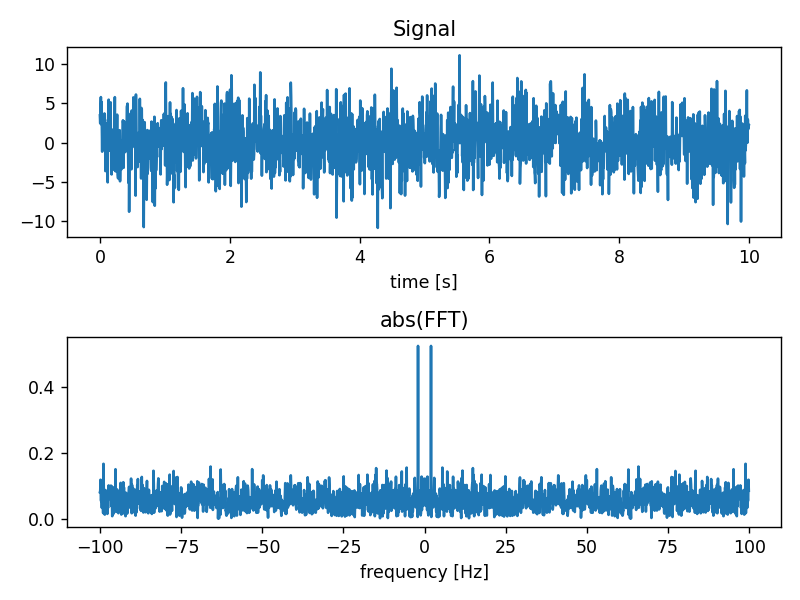

In [20]:
# Create and plot the FFT of a noisy cos wave

### BEGIN SOLUTION
t = np.arange(0, 10, 1/sampling_rate)
cos_signal = np.cos(t * 2*np.pi * 2)
noise = np.random.normal(0, 3, len(cos_signal))
cos_signal_with_noise = cos_signal + noise
plot_fft(t, cos_signal_with_noise, sampling_rate, log=False)
### END SOLUTION

<IPython.core.display.Javascript object>


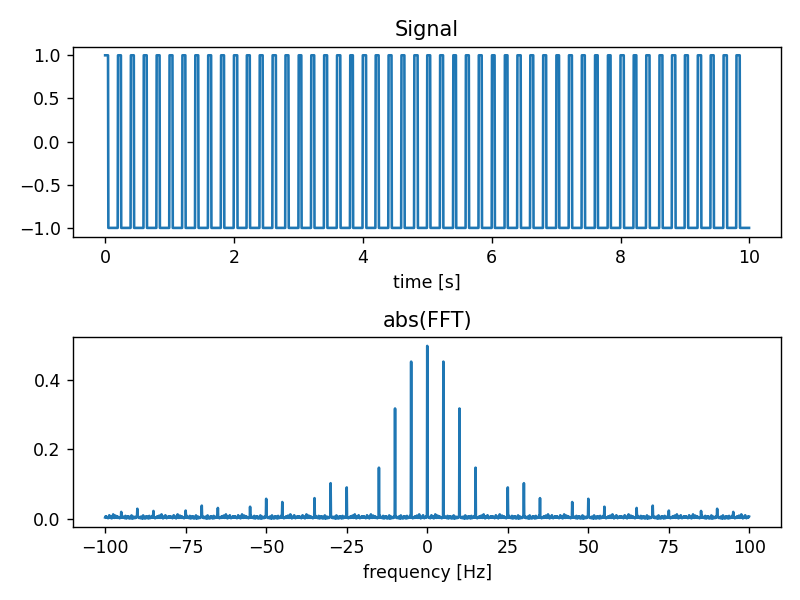

In [21]:
# Create and plot the fft of a square wave
### BEGIN SOLUTION
frequency = 5 # hz
t = np.arange(0, 10, 1/sampling_rate)
square_signal = scipy.signal.square(t * 2*np.pi * frequency, duty=0.25)
plot_fft(t, square_signal, sampling_rate)
### END SOLUTION